# Creating matrices for each sub-path according to the move

In [1]:
import pandas as pd
import numpy as np
import warnings
from PIL import Image

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

path = "data/DB-Output_original.csv"
data = pd.read_csv(path)

data = data.loc[:, ['Initial Solution', 'Moves', 'OFIS', 'OFFS', 'OF_Diff']]
data = data[data.OF_Diff != 0]
#data = data.reset_index(drop=False)

print(data.shape)
data.head(10)

(9248, 5)


,Initial Solution,Moves,OFIS,OFFS,OF_Diff
5,"[['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...","['null', 'null', 'ProbabilisticWorstRemovalCus...",30978.64707,26301.09614,4677.550934
21,"[['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...","['null', 'null', 'WorstTimeDestroyCustomer', '...",26301.09614,23702.14047,2598.955662
30,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...","['null', 'null', 'WorstTimeDestroyCustomer', '...",23702.14047,18726.22750,4975.912973
37,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...","['null', 'null', 'RandomRouteDestroyCustomer',...",18726.22750,17507.99998,1218.227524
40,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","['null', 'null', 'TimeBasedDestroyCustomer', '...",17507.99998,17471.76518,36.234795
43,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","['null', 'null', 'WorstDistanceDestroyCustomer...",17471.76518,17469.41941,2.345772
46,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...","['null', 'null', 'WorstDistanceDestroyCustomer...",17469.41941,16251.78228,1217.637127
47,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['null', 'null', 'DemandBasedDestroyCustomer',...",16251.78228,16249.43924,2.343046
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['RandomDestroyStation', 'DeterministicBestRep...",16249.43924,16221.64776,27.791482
50,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['null', 'null', 'WorstTimeDestroyCustomer', '...",16221.64776,15005.40910,1216.238655


# List of available and applied moves

From the initial dataframe, a list called 'mv' is created, in which all the different moves applied and shown in the table are included.

In [2]:
mv = data["Moves"]
moves = []
for row in mv:
    for elem in row.split("', '"):
        moves.append(elem)

for i in range(len(moves)):
    moves[i] = moves[i].replace("['","")
    moves[i] = moves[i].replace("']","")

to_remove = "null"
moves = list(filter(lambda x: x != to_remove, moves))

moves=list(set(moves))

print("List off", len(moves), "possible e different moves: \n", moves)

List off 16 possible e different moves: 
 ['ProximityBasedDestroyCustomer', 'GreedyRepairCustomer', 'ProbabilisticBestRepairStation', 'RandomRouteDestroyCustomer', 'GreedyDestroyCustomer', 'DemandBasedDestroyCustomer', 'TimeBasedDestroyCustomer', 'WorstDistanceDestroyCustomer', 'ZoneDestroyCustomer', 'GreedyRouteRemoval', 'LongestWaitingTimeDestroyStation', 'ShawDestroyCustomer', 'ProbabilisticWorstRemovalCustomer', 'RandomDestroyStation', 'WorstTimeDestroyCustomer', 'DeterministicBestRepairStation']


In [3]:
data["Moves"] = data["Moves"].str.replace("[","")
data["Moves"] = data["Moves"].str.replace("]","")
data["Moves"] = data["Moves"].str.replace("'","")
data.head(10)

,Initial Solution,Moves,OFIS,OFFS,OF_Diff
5,"[['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...","null, null, ProbabilisticWorstRemovalCustomer,...",30978.64707,26301.09614,4677.550934
21,"[['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...","null, null, WorstTimeDestroyCustomer, GreedyRe...",26301.09614,23702.14047,2598.955662
30,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...","null, null, WorstTimeDestroyCustomer, GreedyRe...",23702.14047,18726.22750,4975.912973
37,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...","null, null, RandomRouteDestroyCustomer, Greedy...",18726.22750,17507.99998,1218.227524
40,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","null, null, TimeBasedDestroyCustomer, GreedyRe...",17507.99998,17471.76518,36.234795
43,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","null, null, WorstDistanceDestroyCustomer, Gree...",17471.76518,17469.41941,2.345772
46,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...","null, null, WorstDistanceDestroyCustomer, Gree...",17469.41941,16251.78228,1217.637127
47,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","null, null, DemandBasedDestroyCustomer, Greedy...",16251.78228,16249.43924,2.343046
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","RandomDestroyStation, DeterministicBestRepairS...",16249.43924,16221.64776,27.791482
50,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","null, null, WorstTimeDestroyCustomer, GreedyRe...",16221.64776,15005.40910,1216.238655


In [4]:
user_input = input("Insert one of 16 possibly moves: ")
data = data.loc[data['Moves'].str.contains(user_input)]
data

,Initial Solution,Moves,OFIS,OFFS,OF_Diff
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","RandomDestroyStation, DeterministicBestRepairS...",16249.439240,16221.647760,27.791482
64,"[['D0', 'C21', 'C25', 'C24', 'D0'], ['D0', 'C5...","RandomDestroyStation, ProbabilisticBestRepairS...",14991.375650,13775.899950,1215.475703
79,"[['D0', 'C81', 'S1', 'C85', 'C90', 'D0'], ['D0...","RandomDestroyStation, ProbabilisticBestRepairS...",11347.289090,11335.314740,11.974343
169,"[['D0', 'C50', 'S11', 'D0'], ['D0', 'C90', 'C9...","RandomDestroyStation, ProbabilisticBestRepairS...",11388.615630,11375.960480,12.655152
199,"[['D0', 'C50', 'D0'], ['D0', 'C90', 'C91', 'C8...","RandomDestroyStation, DeterministicBestRepairS...",10162.383810,10153.083790,9.300018
...,...,...,...,...,...
35215,"[['D0', 'C5', 'C10', 'C11', 'C16', 'C19', 'C18...","RandomDestroyStation, DeterministicBestRepairS...",42453.344550,42085.062130,368.282414
35350,"[['D0', 'C78', 'C67', 'D0'], ['D0', 'C24', 'D0...","RandomDestroyStation, ProbabilisticBestRepairS...",14742.127590,11918.782800,2823.344791
35375,"[['D0', 'C24', 'D0'], ['D0', 'C5', 'C77', 'C78...","RandomDestroyStation, DeterministicBestRepairS...",7297.435520,7297.381645,0.053875
35385,"[['D0', 'C5', 'C2', 'C1', 'C14', 'C25', 'C21',...","RandomDestroyStation, DeterministicBestRepairS...",4844.669310,4843.734853,0.934457


These steps are used to isolate the places contained in the 'Initial Solution' column, so that a matrix can be constructed according to the move being considered

In [5]:
init_sol = data['Initial Solution']
init_sol.head(10)

#path isolation -> all paths of all indices are included in the sol list
sol = []
for row in init_sol:
    for elem in row.split("[' "):
        sol.append(elem)

for i in range(len(sol)):
    sol[i] = sol[i].replace("[['","")
    sol[i] = sol[i].replace("']]","")
    sol[i] = sol[i].replace("'","")
    sol[i] = sol[i].replace(",","")
    sol[i] = sol[i].replace("[","")    
    
for i in range(len(sol)):
    sol[i] = sol[i].split('] ')

In [6]:
data["Initial Solution"] = data["Initial Solution"].str.replace("[","")
data["Initial Solution"] = data["Initial Solution"].str.replace("]","")
data["Initial Solution"] = data["Initial Solution"].str.replace(",","")
data["Initial Solution"] = data["Initial Solution"].str.replace("'","")

init_sol = data["Initial Solution"]

places = []
for row in init_sol:
    for elem in row.split():
        places.append(elem)

places = np.array(places)
distinct_places = np.unique(places)

print(distinct_places)
print(len(distinct_places))


['C1' 'C10' 'C100' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19'
 'C2' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3'
 'C30' 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C37' 'C38' 'C39' 'C4' 'C40'
 'C41' 'C42' 'C43' 'C44' 'C45' 'C46' 'C47' 'C48' 'C49' 'C5' 'C50' 'C51'
 'C52' 'C53' 'C54' 'C55' 'C56' 'C57' 'C58' 'C59' 'C6' 'C60' 'C61' 'C62'
 'C63' 'C64' 'C65' 'C66' 'C67' 'C68' 'C69' 'C7' 'C70' 'C71' 'C72' 'C73'
 'C74' 'C75' 'C76' 'C77' 'C78' 'C79' 'C8' 'C80' 'C81' 'C82' 'C83' 'C84'
 'C85' 'C86' 'C87' 'C88' 'C89' 'C9' 'C90' 'C91' 'C92' 'C93' 'C94' 'C95'
 'C96' 'C97' 'C98' 'C99' 'D0' 'S0' 'S1' 'S10' 'S11' 'S12' 'S13' 'S14'
 'S15' 'S16' 'S17' 'S18' 'S19' 'S2' 'S20' 'S3' 'S4' 'S5' 'S7' 'S9']
120


In [7]:
# empty list
lista_principale = [] # contains n elements, each element contains n dataframes related to the n-th index

for index_ext, value_ext in enumerate(sol):
    
    lista_dataframe = []
    for index_int, value_int in enumerate(value_ext):

        #print(type(value_ext, value_int))
        zeros = np.zeros([len(distinct_places), len(distinct_places)])
        df = pd.DataFrame(zeros, index=distinct_places, columns=distinct_places)

        temp_string = value_int

        split = temp_string.split(" ")
        split = np.array(split)

        for i in range(len(split)-1):

            df.loc[split[i], split[i+1]] = 1

        lista_dataframe.append(df)

    # sum of the resulting dataframes into a single dataframe
    df_sum = lista_dataframe[0]
    for i in range (1, len(lista_dataframe)):
        df_sum = df_sum.add(lista_dataframe[i])

    # insert the sum dataframe in the main list
    lista_principale.append(df_sum)

In [8]:
X = np.array([df.to_numpy() for df in lista_principale])
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
#my_list = [pd.DataFrame(np.random.randint(10, size=(120, 120))) for _ in range(800)]
#out = np.array([df.to_numpy() for df in my_list])

In [10]:
improvement = pd.Series()
data['Improvement'] = improvement

label = pd.Series()
data['Label'] = label

data.head()

,Initial Solution,Moves,OFIS,OFFS,OF_Diff,Improvement,Label
49,D0 C26 C25 D0 D0 C24 C6 D0 D0 C91 D0 D0 C50 D0...,"RandomDestroyStation, DeterministicBestRepairS...",16249.43924,16221.64776,27.791482,NaN,NaN
64,D0 C21 C25 C24 D0 D0 C50 D0 D0 C81 S1 C85 C90 ...,"RandomDestroyStation, ProbabilisticBestRepairS...",14991.37565,13775.89995,1215.475703,NaN,NaN
79,D0 C81 S1 C85 C90 D0 D0 C18 C15 C16 S7 D0 D0 C...,"RandomDestroyStation, ProbabilisticBestRepairS...",11347.28909,11335.31474,11.974343,NaN,NaN
169,D0 C50 S11 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18...,"RandomDestroyStation, ProbabilisticBestRepairS...",11388.61563,11375.96048,12.655152,NaN,NaN
199,D0 C50 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18 C15...,"RandomDestroyStation, DeterministicBestRepairS...",10162.38381,10153.08379,9.300018,NaN,NaN


In [11]:
conditions = [
    (data['OF_Diff'] < 0), #negative
    (data['OF_Diff'] >= 0) & (data['OF_Diff'] < 2), #zero
    (data['OF_Diff'] >= 2) & (data['OF_Diff'] < 25), #little
    (data['OF_Diff'] >= 25) & (data['OF_Diff'] < 60), #medium
    (data['OF_Diff'] >= 60) #a lot
]

classi = ["Negative", "Zero", "Little", "Medium", "Lot"]
label = [0, 1, 2, 3, 4]

data['Improvement'] = np.select(conditions, classi)
data["Label"] = np.select(conditions, label)

data.head()

,Initial Solution,Moves,OFIS,OFFS,OF_Diff,Improvement,Label
49,D0 C26 C25 D0 D0 C24 C6 D0 D0 C91 D0 D0 C50 D0...,"RandomDestroyStation, DeterministicBestRepairS...",16249.43924,16221.64776,27.791482,Medium,3
64,D0 C21 C25 C24 D0 D0 C50 D0 D0 C81 S1 C85 C90 ...,"RandomDestroyStation, ProbabilisticBestRepairS...",14991.37565,13775.89995,1215.475703,Lot,4
79,D0 C81 S1 C85 C90 D0 D0 C18 C15 C16 S7 D0 D0 C...,"RandomDestroyStation, ProbabilisticBestRepairS...",11347.28909,11335.31474,11.974343,Little,2
169,D0 C50 S11 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18...,"RandomDestroyStation, ProbabilisticBestRepairS...",11388.61563,11375.96048,12.655152,Little,2
199,D0 C50 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18 C15...,"RandomDestroyStation, DeterministicBestRepairS...",10162.38381,10153.08379,9.300018,Little,2


To recap, starting with the choice of a move (from the 16 available), all iterations of the algorithm that apply the move in question are taken.

Adjacency matrices are then generated for each sub-path in which the chosen move is applied, and summed up all the matrices into a single resultant per iteration.

At the end, in 'main_list', a list containing the resulting adjacency matrices from all iterations is obtained.

# Example notebook iteration

- take the main dataframe

- one of 16 possible moves is chosen (e.g. 'ShawDestroyCustomer', 'ProximityBasedDestroyCustomer', 'GreedyRouteRemoval'...)

- the original dataframe is reduced to just the interactions where the chosen move was applied

- for each row of the dataframe we have an iteration comprising several sub-paths

- an adjacency (sub)matrix is generated for each sub-path (so we have n matrices per row)

- each (sub)matrix is summed into a single resulting matrix (so one per row)

- the resulting adjacency matrices relating to a specific move are placed in a list.

In [12]:
y = data["Label"].values
X.shape, y.shape

((477, 120, 120), (477,))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

x_test.shape, y_train.shape

((96, 120, 120), (381,))

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((381, 120, 120, 1), (96, 120, 120, 1), (381, 1), (96, 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

#create model
model = Sequential()

#add model layers

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(120,120,1), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='relu'))

2023-01-17 19:38:16.167155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 19:38:23.349995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 64)        0         
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 128)               29491328  
                                                        

In [ ]:
model.compile(optimizer='adam', loss='', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 13s 911ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 2/10
12/12 [==============================] - 11s 911ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 3/10
12/12 [==============================] - 10s 855ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 4/10
12/12 [==============================] - 11s 884ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 5/10
12/12 [==============================] - 11s 881ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 6/10
12/12 [==============================] - 10s 868ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 7/10
12/12 [==============================] - 10s 800ms/step - loss: nan - accuracy: 0.0630 - val_loss: nan - val_accuracy: 0.0521
Epoch 8/10
12/12 [=======================

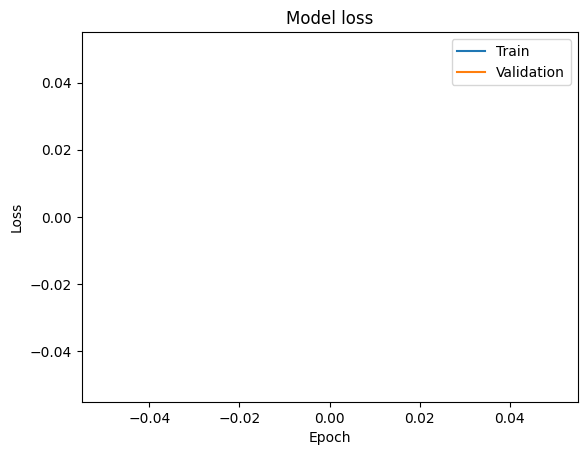

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', "Validation"], loc='upper right')
plt.show()